In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16 #   Visual Geomety group(VGG) of oxfod uni, 16 layers, 13 cov, 3 FC
img_size = (128, 128)
batch_size = 32
epochs = 30 
learning_rate = 0.0001 
dataset_path=  "C:\\Users\\apili\\Downloads\\train"
def load_and_preprocess_dataset(dataset_path):
    data = []
    labels = []
    
    class_labels = {'cats': 0, 'dogs': 1}  # Map class labels to numeric values
    
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize pixel values to be between 0 and 1
            data.append(img)
            labels.append(class_labels[label])

    return np.array(data), np.array(labels)

data, labels = load_and_preprocess_dataset(dataset_path)

# Splitingt the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



# Using VGG16 as a base model
base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freezing the convolutional layers
for layer in base_model.layers:
    layer.trainable = False



# Create a new model on top
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))


ptimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
                    epochs=epochs, 
                    validation_data=(X_val, y_val))


# Evaluate the model on the validation set
predictions = (model.predict(X_val) > 0.5).astype("int32")


print(classification_report(y_val, predictions))
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 31s 1us/step
Epoch 1/30


c:\Users\apili\Desktop\Projects\Neural-Networks\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 623ms/step - accuracy: 0.5699 - loss: 1.9659 - val_accuracy: 0.5446 - val_loss: 0.8001
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 604ms/step - accuracy: 0.6764 - loss: 0.6091 - val_accuracy: 0.7500 - val_loss: 0.3509
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 622ms/step - accuracy: 0.8153 - loss: 0.4078 - val_accuracy: 0.8125 - val_loss: 0.3347
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 620ms/step - accuracy: 0.8006 - loss: 0.4052 - val_accuracy: 0.7946 - val_loss: 0.3439
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 636ms/step - accuracy: 0.8182 - loss: 0.3265 - val_accuracy: 0.8125 - val_loss: 0.3535
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step - accuracy: 0.8644 - loss: 0.3243 - val_accuracy: 0.7946 - val_loss: 0.3956
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 628ms/step - accuracy: 0.8646 - loss: 0.2896 - val_accuracy: 0.8304 - val_loss: 0.3282
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 625ms/step - accuracy: 0.8817 - loss: 0.2744 - val_accuracy: 0.8125 - val

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,300,677 (104.14 MB)

 Trainable params: 4,195,329 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 8,390,660 (32.01 MB)

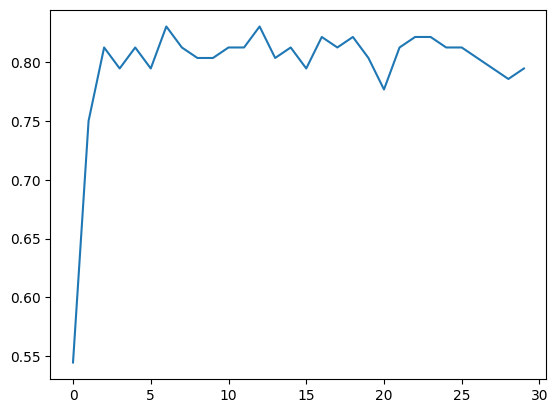

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

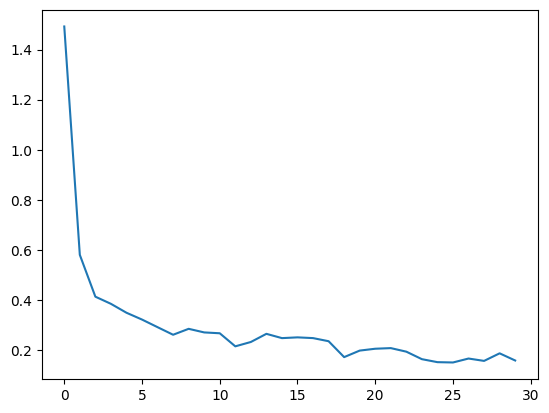

In [13]:
plt.plot(history.history['loss'])